# Support Vector Machine Explained with NN comparison
References:  
https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists/dp/1449369413

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import sys
sys.path.append('/Users/kaonpark/workspace/github.com/likejazz/kaon-learn')
import kaonlearn
from kaonlearn.plots import plot_decision_regions, plot_learning_curve

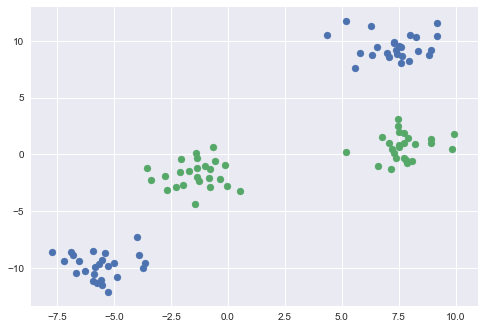

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

X_x = X[:, 0]
X_y = X[:, 1]

plt.scatter(X_x[y == 0], X_y[y == 0])
plt.scatter(X_x[y == 1], X_y[y == 1])

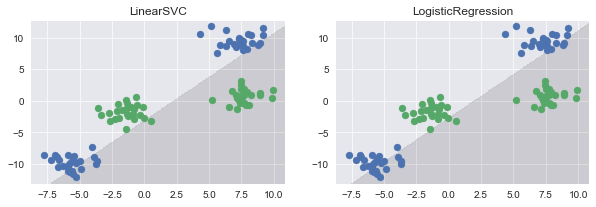

In [3]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)

    plot_decision_regions(X, y, clf=clf, ax=ax, legend=0)

    ax.set_title("{}".format(clf.__class__.__name__))

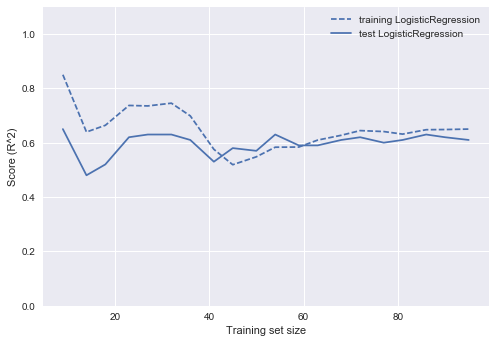

In [4]:
plot_learning_curve(LogisticRegression(), X, y)

In [5]:
X[:3]

array([[-1.72161036, -1.48033142],
       [-3.6573384 , -9.5482383 ],
       [ 7.0778163 ,  0.99508772]])

In [6]:
X[:, 1][:3]

array([-1.48033142, -9.5482383 ,  0.99508772])

In [7]:
X[:, 1:][:3]

array([[-1.48033142],
       [-9.5482383 ],
       [ 0.99508772]])

In [8]:
(X[:, 1:] ** 2)[:3]

array([[  2.19138111],
       [ 91.16885455],
       [  0.99019957]])

In [9]:
X_new = np.hstack([X, X[:, 1:] ** 2])
X_new[:3]

array([[ -1.72161036,  -1.48033142,   2.19138111],
       [ -3.6573384 ,  -9.5482383 ,  91.16885455],
       [  7.0778163 ,   0.99508772,   0.99019957]])

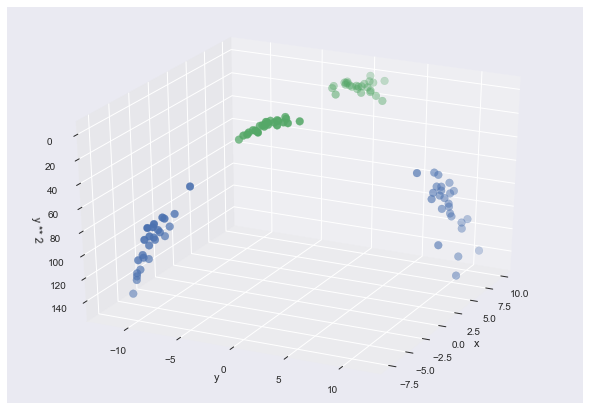

In [10]:
# add the squared first feature
# hstack: Stack arrays in sequence horizontally (column wise).
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D
# visualize in 3D
ax = Axes3D(plt.figure(), elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
ax.scatter(X_new[y == 0, 0], X_new[y == 0, 1], X_new[y == 0, 2], s=60)
ax.scatter(X_new[y == 1, 0], X_new[y == 1, 1], X_new[y == 1, 2], s=60)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("y ** 2")

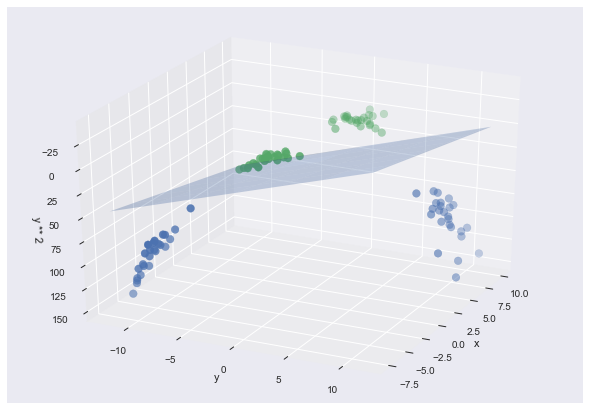

In [11]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
ax = Axes3D(plt.figure(), elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min(), X_new[:, 0].max(), 50)
yy = np.linspace(X_new[:, 1].min(), X_new[:, 1].max(), 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[y == 0, 0], X_new[y == 0, 1], X_new[y == 0, 2], s=60)
ax.scatter(X_new[y == 1, 0], X_new[y == 1, 1], X_new[y == 1, 2], s=60)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("y ** 2")

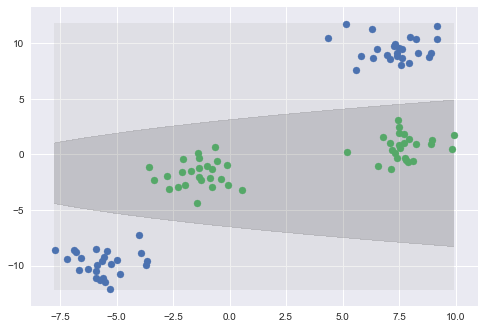

In [12]:
from matplotlib.colors import ListedColormap
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], alpha=0.2)

plt.scatter(X_x[y == 0], X_y[y == 0])
plt.scatter(X_x[y == 1], X_y[y == 1])

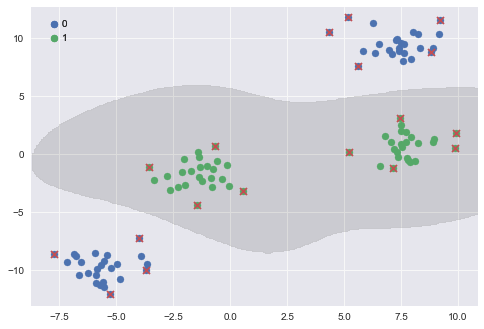

In [13]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)                                                

plot_decision_regions(X, y, clf=svm)

# plot support vectors
sv = svm.support_vectors_
plt.scatter(sv[:, 0], sv[:, 1], marker='x')

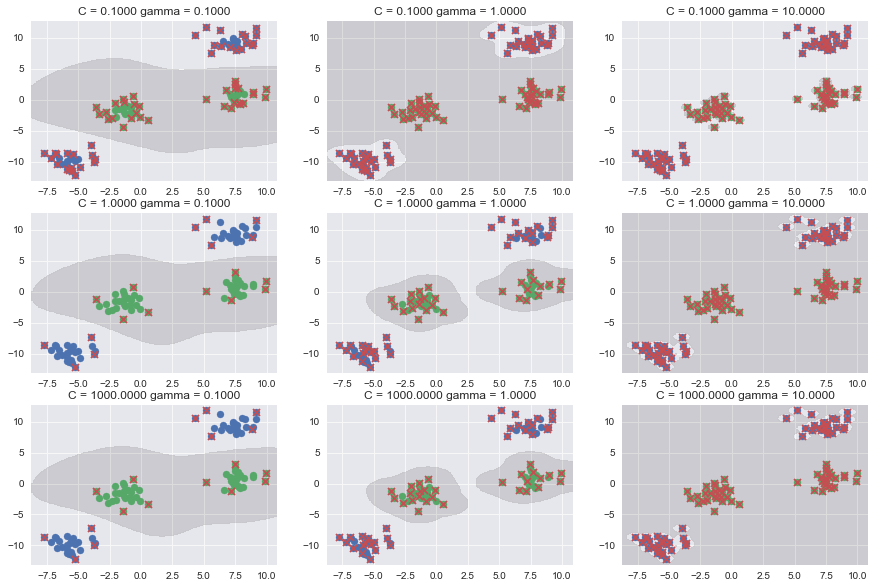

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        a.set_title("C = %.4f gamma = %.4f" % (10. ** C, 10. ** gamma))
        svm = SVC(kernel='rbf', C=10. ** C, gamma=10. ** gamma).fit(X, y)                                                
        plot_decision_regions(X, y, clf=svm, ax=a, legend=0)
        
        # plot support vectors
        sv = svm.support_vectors_
        a.scatter(sv[:, 0], sv[:, 1], marker='x')

- Going from left to right, we increase the value of the parameter *gamma* from 0.1 to 10. A small gamma means a large radius for the Gaussian kernel, which means that many points are considered close by. This is reflected in very smooth decision boundaries on the left, and boundaries that focus more on single points further to the right.
- Going from top to bottom, we increase the *C* parameter from 0.1 to 1000. As with the linear models, a small C means a very restricted model, where each data point can only have very limited influence. Increasing C allows these points to have a stronger influence on the model and makes the decision boundary bend to correctly classify them.

# Neural Networks
By default, the MLP uses 100 hidden nodes.

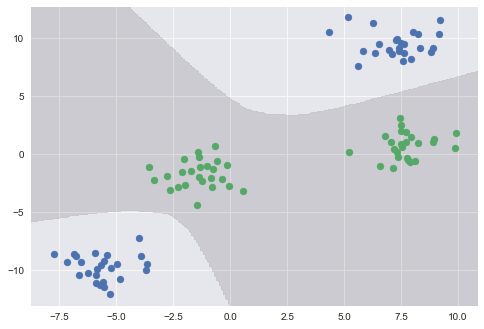

In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='adam', random_state=0, hidden_layer_sizes=[1000]).fit(X_train, y_train)
plot_decision_regions(X, y, clf=mlp, legend=0)

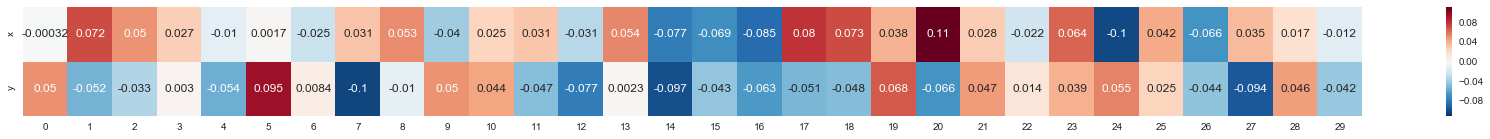

In [16]:
plt.figure(figsize=(30, 2))
sns.heatmap(mlp.coefs_[0][:, :30], yticklabels=["x", "y"], annot=True)

# Keras Implementation

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()

# 1000 * 1
model.add(Dense(1000, input_dim=2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              3000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1001      
Total params: 4,001.0
Trainable params: 4,001.0
Non-trainable params: 0.0
_________________________________________________________________


In [18]:
from keras_tqdm import TQDMNotebookCallback
model.fit(X_train, y_train, epochs=1000, verbose=0, callbacks=[TQDMNotebookCallback(show_inner=False)])

In [19]:
evaluation = model.evaluate(X_test, y_test)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

25/25 [==============================] - 0s
Summary: Loss over the test dataset: 0.00, Accuracy: 1.00


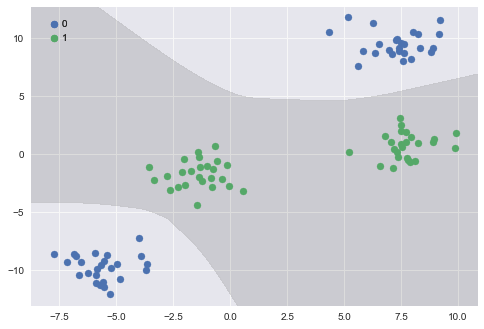

In [20]:
plot_decision_regions(X, y, clf=model)

In [21]:
model = Sequential()

# 1000 * 1000 * 1
model.add(Dense(1000, input_dim=2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              3000      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1001      
Total params: 1,005,001.0
Trainable params: 1,005,001.0
Non-trainable params: 0.0
_________________________________________________________________


In [22]:
model.fit(X_train, y_train, epochs=1000, verbose=0, callbacks=[TQDMNotebookCallback(show_inner=False)])

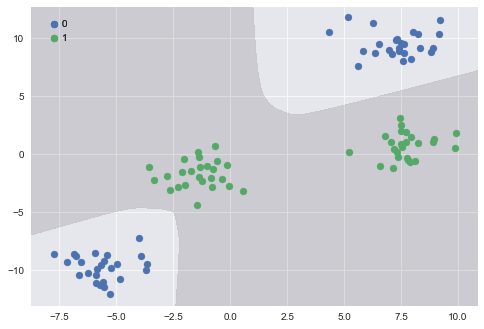

In [23]:
plot_decision_regions(X, y, clf=model)